In [ ]:
import pathlib
import os
if 'TSL_SCHOOL_DIR' in os.environ:
     if any( (p/".git").is_dir() for p in
(pathlib.Path(".").absolute().resolve()/"dummy").parents ):
         raise RuntimeError('Please copy notebook to a work directory')

# Electronic Band Structure  



In this exercise we want to see how the electronic bands chance along an high-symmetry path in the Silicon Brillouin Zone. 

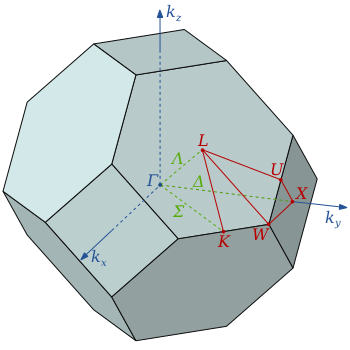

We start by running a self consistent calculation 

    pw.x -inp pw.scf.silicon.in >> pw.scf.silicon.out
    
The input is very similar to the one we used before with just one change, if we want to include also the empty we need to specify the total number of states using the 'nbnd' keyword, otherwise only the occupied states will be included.

After the SCF calculation is converged we can perform the bands calculation, a non self-consistent and reads the ground state electron density, Hartree, exchange and correlation potentials computed in SCF step.  In case of non self-consistent calculation, the pw.x only recomputes the Kohn-Sham eigenfunction and eigenvalues without recomputing the charge density. You need to specify the k-points, or k-points path, for which we want to calculate the eigenvalues.

Let's have a look at the input file:

In [1]:
cat ./pw.bands.silicon.in

&CONTROL

  ! here we specify  new type of calculation, 'bands' that is a non-self consistent calculation to determine the eigenvalues at the specified k-points
  calculation = 'bands'
  
  prefix = 'si'
  outdir = './'
  pseudo_dir = './pseudo/'
  verbosity = 'high'  
/
&SYSTEM
  ecutwfc =   30
  ecutrho =   240
  ibrav = 0
  nat = 2
  ntyp = 1
  
  ! here we need to specify the number of bands, otherwise only the occupied ones are included
  nbnd = 10
/
&ELECTRONS
  conv_thr =   4.0000000000d-10
  electron_maxstep = 100
  mixing_beta =   0.4
/
ATOMIC_SPECIES
Si     28.0855 Si.pbe-n-rrkjus_psl.1.0.0.UPF
ATOMIC_POSITIONS angstrom
Si            0.0000000000       -0.0000000000        0.0000000000
Si            1.3672162898        1.3672162898        1.3672162898
CELL_PARAMETERS angstrom
   2.734432580   2.734432580   0.000000000
   2.734432580   0.000000000   2.734432580
   0.000000000   2.734432580   2.734432580
K_POINTS {crystal_b}
5
  0.0000 0.5000 0.0000 20  !L
  0.0000 0.0000 0.000

We can run it using the usual command:
   
        pw.x -inp pw.bands.silicon.in > pw.bands.silicon.out

After the calculation is performed we can use a postprocessing tool called bands.x to obtain the bands in a more user friendly format. The input is very simple:

In [2]:
cat ./pp.bands.silicon.in

&BANDS
  prefix = 'si'
  outdir = './'
  filband = 'si_bands.dat'
/


To run it use 

    bands.x -inp pp.bands.silicon.in > pp.bands.silicon.out
    
 The code will produce two files 'si_bands.dat' and 'si_bands.dat.gnu' containing the bands in readable format. 
 QE has a built-in plotting tool called plotbands.x or you can use whatever code you like.

In [3]:
import numpy as np
import matplotlib.pyplot as plt



# load data
data = np.loadtxt('./si_bands.dat.gnu')

k = np.unique(data[:, 0])
bands = np.reshape(data[:, 1], (-1, len(k)))

for band in range(len(bands)):
    plt.plot(k, bands[band, :], linewidth=1, alpha=0.5, color='k')
plt.xlim(min(k), max(k))


# High symmetry k-points (check bands_pp.out)
plt.axvline(0.6124, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(1.3195, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(1.5695, linewidth=0.75, color='k', alpha=0.5)
# text labels
plt.xticks(ticks= [0, 0.6124, 1.3195, 1.5695, 2.3195], \
           labels=['L', '$\Gamma$', 'X', 'U', '$\Gamma$'])
plt.ylabel("Energy (eV)")
plt.show()

ModuleNotFoundError: No module named 'matplotlib'